In [1]:
from peak_warming_calculator  import *
import matplotlib.pyplot as plt

In [2]:
from SALib.sample import saltelli
from SALib.analyze import sobol
import numpy as np
from numpy import genfromtxt
import matplotlib.cm as cm

In [3]:
import time

# Sensitivity Analysis

In [4]:
r_minus_g = 0.015
consumption_growth = 0.02
consumption_discount = consumption_growth + r_minus_g

In [5]:
problem = {
'num_vars': 6,
'names': ['gamma', 'D0', 'P_100', 'P_50/P_100', 's/r', 'TCRE_1'],
'bounds': [
[2*0.9, 2*1.1],
[0.00236*0.9, 0.00236*1.1],
[300*0.9, 300*1.1],
[0.4*0.9, 0.4*1.1],
[2*0.9, 2*1.1],
[0.00045*0.9, 0.00045*1.1]]
}

# Generate samples
param_values = saltelli.sample(problem, 64)    

In [6]:
param_values[0]

array([1.80937500e+00, 2.31206250e-03, 3.19218750e+02, 4.26875000e-01,
       2.05937500e+00, 4.45078125e-04])

In [7]:
len(param_values)

896

In [8]:
peak_T_list = []

for i in range(len(param_values)):
    if i % 32 == 0:
        print(i)
        t = time.localtime()
        current_time = time.strftime("%H:%M:%S", t)
        print(current_time)
    
    gamma = param_values[i][0]
    D0 = param_values[i][1]
    P_100 = param_values[i][2]
    P_50 = param_values[i][3] * P_100
    r = consumption_discount
    s = param_values[i][4]*r
    T_TCRE_1 = param_values[i][5]
    
    peak_T = peak_warming_calculator(P_50=P_50, P_100=P_100, gamma=gamma, D0=D0, consumption_growth=consumption_growth, consumption_discount=consumption_discount, s=s, r=r, T_TCRE_1=T_TCRE_1)
    peak_T_list.append(peak_T)

0
12:25:30


/Users/aaron/Documents/oxford_physics/Year_4/MPhys/drivers-of-peak-warming/peak_warming_calculator/peak_warming_calculator.py:126: RuntimeWarning: divide by zero encountered in power
  A = Am / (1 + ((P - P0) / (P_h - P0)) ** (-s / r))


32
12:28:56
64
12:32:38
96
12:36:12
128
12:39:41
160
12:43:18
192
12:46:54
224
12:50:39
256
12:54:09
288
12:57:54
320
13:01:32
352
13:04:57
384
13:08:49
416
13:12:26
448
13:16:08
480
13:19:53
512
13:23:34
544
13:27:15
576
13:30:29
608
13:34:24
640
13:38:07
672
13:41:49
704
13:45:27
736
13:48:56
768
13:52:33
800
13:55:54
832
13:59:33
864
14:03:16


                  ST   ST_conf
gamma       0.751396  0.230050
D0          0.090526  0.026744
P_100       0.091297  0.041740
P_50/P_100  0.066039  0.024511
s/r         0.000479  0.000212
TCRE_1      0.037321  0.016282
                  S1   S1_conf
gamma       0.767661  0.287944
D0          0.068952  0.117725
P_100       0.089528  0.113684
P_50/P_100  0.062587  0.076737
s/r         0.000264  0.006144
TCRE_1      0.034215  0.070138
                            S2   S2_conf
(gamma, D0)          -0.025830  0.314224
(gamma, P_100)       -0.020238  0.370788
(gamma, P_50/P_100)  -0.013365  0.322047
(gamma, s/r)         -0.020547  0.317515
(gamma, TCRE_1)      -0.013401  0.344310
(D0, P_100)           0.049436  0.177187
(D0, P_50/P_100)      0.032967  0.173128
(D0, s/r)             0.033750  0.173854
(D0, TCRE_1)          0.027344  0.174191
(P_100, P_50/P_100)  -0.012669  0.120327
(P_100, s/r)         -0.012914  0.111308
(P_100, TCRE_1)      -0.010535  0.122944
(P_50/P_100, s/r)    -0.002695  0

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

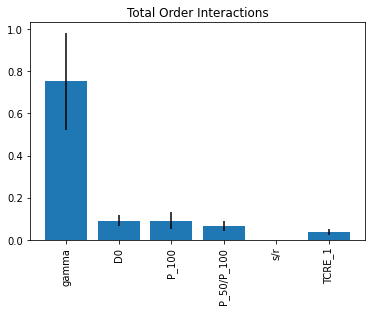

In [9]:
peak_T_list = np.asarray(peak_T_list)

Si = sobol.analyze(problem, peak_T_list, print_to_console=True)

total_Si, first_Si, second_Si = Si.to_df()

plt.title("Total Order Interactions")
plt.bar(total_Si.index, total_Si['ST'], yerr=total_Si['ST_conf'])
plt.xticks(rotation=90)